In [113]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [114]:
import numpy as np
import pandas as pd
import datetime as dt

In [115]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [116]:
# Change the NaN's for the precipitation column (convert to zero)
#df_measurements['prcp'] = df_measurements['prcp'].fillna(0)
# Write cleaned measurements dataframe to fresh file
#df_measurements.to_csv("../Resources/clean_measurements.csv", encoding="utf-8", index=True)

# Read the data into dataframe
df_measurements = pd.read_csv("../Resources/clean_measurements.csv")
df_stations = pd.read_csv("../Resources/stations.csv")
#
df_measurements.head(10)
#df_stations.head(10)


,Unnamed: 0,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,4,USC00519397,2010-01-06,0.00,73
5,5,USC00519397,2010-01-07,0.06,70
6,6,USC00519397,2010-01-08,0.00,64
7,7,USC00519397,2010-01-09,0.00,68
8,8,USC00519397,2010-01-10,0.00,73
9,9,USC00519397,2010-01-11,0.01,64


In [117]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)

In [118]:
# Create our session (link) from Python to the DB
session = Session(engine)

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [119]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [120]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [121]:
# Precipation Analysis
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
# Query all tobs values
results = session.query(Measurement.tobs).all()
# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))
#tobs_values


In [122]:
#Design a query to retrieve the last 12 months of precipitation data.
precipitation_last_12months = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

# Write the results to dataframe
df_precipitation_last_12months = pd.DataFrame(data=precipitation_last_12months)
#df_precipitation_last_12months

In [123]:
#set the Date as Index
df_precipitation_last_12months = df_precipitation_last_12months.set_index("date")
#df_precipitation_last_12months.head(20)


([<matplotlib.axis.XTick at 0x20093c5e3c8>,
 <a list of 12 Text xticklabel objects>)

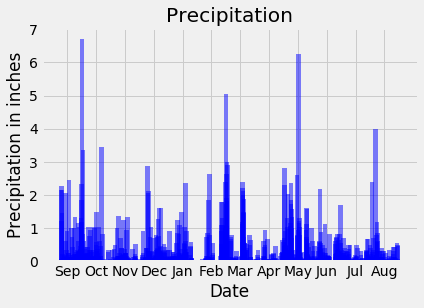

In [124]:
# Set the labels
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")

# Set the months for x-ticks labels
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Set X and Y values
y = df_precipitation_last_12months["prcp"].tolist()
x = np.arange(0, len(df_precipitation_last_12months.index.tolist()), 1)

# Set the positioning for X-tick labels
total_months = len(y)
xticks = int((total_months / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, total_months, xticks)]
# Draw the plot
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)

In [125]:
# Station Analysis
#Design a query to calculate the total number of stations.
total_number_of_stations = session.query(func.count(Station.station)).first()
print(f"Total number of stations: {str(total_number_of_stations[0])}")


Total number of stations: 9


In [126]:
# Design a query to find the most active stations.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# Write the results to dataframe
df_most_active_stations = pd.DataFrame(data=most_active_stations, columns=['Station', 'Count'])
df_most_active_stations.head()





,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [127]:
# Which station has the highest number of observations?
highest_number_of_observations = df_most_active_stations["Station"][0]
highest_observations = df_most_active_stations["Count"][0]
print(f"Station with highest number of observations ({highest_observations}): {highest_number_of_observations}")


Station with highest number of observations (2772): USC00519281


In [128]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.(highest_number_of_observations)
tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').\
    filter(Measurement.station == highest_number_of_observations).\
    order_by(Measurement.tobs).all()
    
tobs




[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

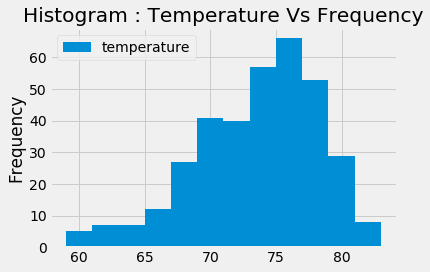

In [133]:
# Plot the results as a histogram with bins=12.

# Choose the station with the highest number of temperature observations.
station_high_temps = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
station_high_temps= station_high_temps[0]

max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = max_date[0]
year_ago = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=366)


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_high_temp_observation = session.query( Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == most_temps_station).all()
station_high_temp_observation = pd.DataFrame(temperature_observations, columns=['temperature'])

# We need 12 bins since the observation is for twelve months
station_high_temp_observation.plot.hist(bins=12, title="Histogram : Temperature Vs Frequency")
plt.tight_layout()
plt.show()